# SVM

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_class(model, X, Y,n):
  xmin, xmax = np.amin(X[:,0]), np.amax(X[:,0])
  ymin, ymax = np.amin(X[:,1]), np.amax(X[:,1])
  xx, yy = np.meshgrid(np.linspace(xmin,xmax,n),np.linspace(ymin,ymax,n))
  z = np.c_[xx.ravel(), yy.ravel()]
  Y_predict = model.predict(z)
  Y_predict = Y_predict.reshape(xx.shape)
  cmap = plt.get_cmap('coolwarm')
  plt.contourf(xx,yy,Y_predict, cmap=cmap)
  cmap = plt.get_cmap('seismic')
  plt.scatter(X[:,0], X[:,1], 20.0, Y, cmap=cmap)
  plt.show()

In [7]:
def plot_proba(model, X, Y,n):
  xmin, xmax = np.amin(X[:,0]), np.amax(X[:,0])
  ymin, ymax = np.amin(X[:,1]), np.amax(X[:,1])
  xx, yy = np.meshgrid(np.linspace(xmin,xmax,n),np.linspace(ymin,ymax,n))
  z = np.c_[xx.ravel(), yy.ravel()]
  Y_predict = model.predict_proba(z)[:,1]
  Y_predict = Y_predict.reshape(xx.shape)
  cmap = plt.get_cmap('coolwarm')
  plt.contourf(xx,yy,Y_predict, cmap=cmap)
  cmap = plt.get_cmap('seismic')
  plt.scatter(X[:,0], X[:,1], 20.0, Y, cmap=cmap)
  plt.show()

## SVM Lineal

In [4]:
# Dataset
from sklearn.datasets import make_classification
n = 250
X, Y = make_classification(n_samples=n, n_features=2, n_informative=2, 
                           n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=0)

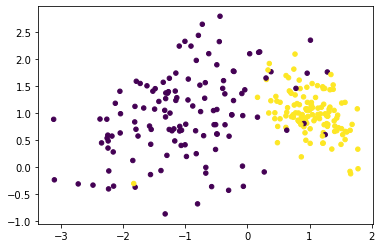

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],20.0,Y)
plt.show()

In [19]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', probability=True)

In [20]:
svc.fit(X,Y)

SVC(kernel='linear', probability=True)

In [21]:
svc.score(X,Y)

0.952

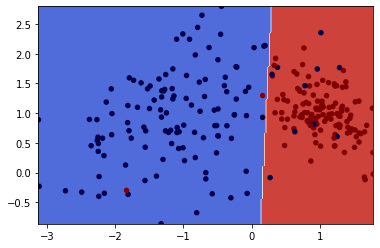

In [22]:
plot_class(svc,X,Y,200)

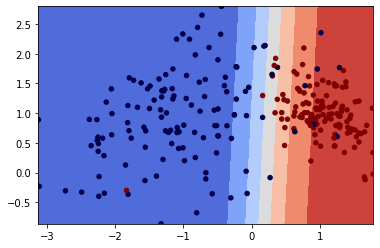

In [23]:
plot_proba(svc,X,Y,200)

## Caso no lineal

In [30]:
#Dataset
from sklearn.datasets import make_circles
X, Y = make_circles(n_samples=n, noise=0.1, factor=0.5, random_state = 0)

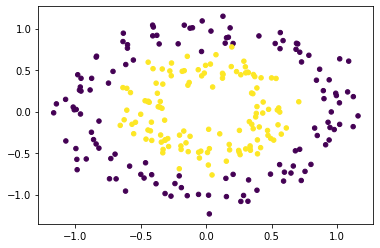

In [31]:
plt.scatter(X[:,0],X[:,1],20.0,Y)
plt.show()

In [32]:
svc.fit(X,Y)
svc.score(X,Y)

0.552

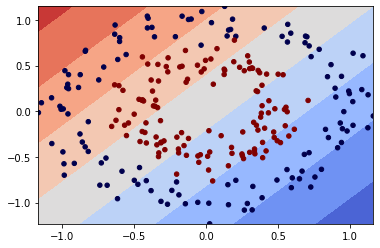

In [33]:
plot_proba(svc,X,Y,150)

SVM con kernel RBF

In [34]:
svc = SVC(kernel="rbf")

In [35]:
svc.fit(X,Y)
svc.score(X,Y)

0.984

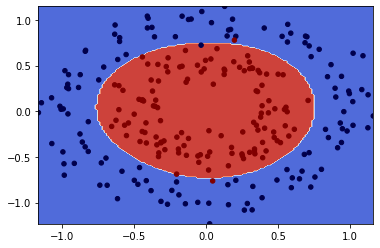

In [36]:
plot_class(svc,X,Y,150)

## Optimizacion de parametros

In [58]:
# Dataset
from sklearn.datasets import make_moons
n = 300
X,Y = make_moons(n_samples=n, noise=0.2, random_state=0)

In [60]:
xx = np.random.uniform(-1.5, 0.0, size=10)
yy = np.random.uniform(-1.0, 0.5, size=10)

In [62]:
XX, YY = np.meshgrid(xx, yy)

In [69]:
Z = np.c_[XX.ravel(),YY.ravel()]
Z_y = np.array([2]*100)

In [70]:
X = np.r_[X,Z]
Y = np.r_[Y,Z_y]

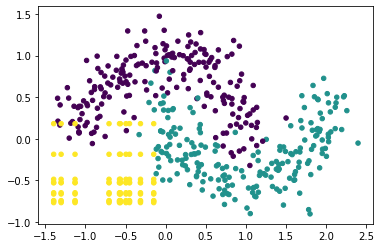

In [71]:
plt.scatter(X[:,0],X[:,1],20.0,Y)
plt.show()

GridSearch

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {
                  'kernel': ['linear','rbf','poly','sigmoid'],
                  'C': [4.5, 4.75, 5.0, 5.1, 5.2]
              }
]
gscv = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=8)

In [81]:
gscv.fit(X,Y)

GridSearchCV(cv=8, estimator=SVC(),
             param_grid=[{'C': [4.5, 4.75, 5.0, 5.1, 5.2],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             scoring='accuracy')

In [82]:
gscv.best_score_

0.931899641577061

In [83]:
gscv.best_params_

{'C': 5.1, 'kernel': 'rbf'}

In [84]:
# Comparacion con C=1.0 
svc.fit(X,Y)
svc.score(X,Y)

0.932

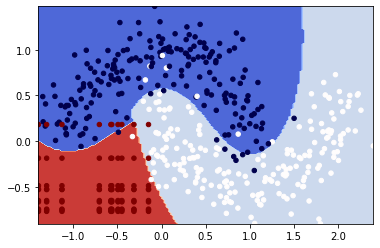

In [85]:
plot_class(gscv,X,Y,150)

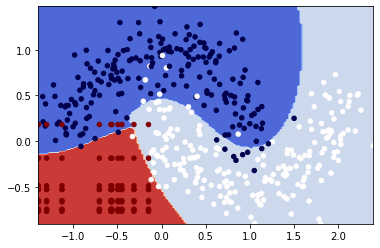

In [86]:
plot_class(svc,X,Y,150)

## Nu-SVM

In [87]:
# Dataset
n = 250
X, Y = make_classification(n_samples=n, n_features=2, n_informative=2, 
                           n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=0)

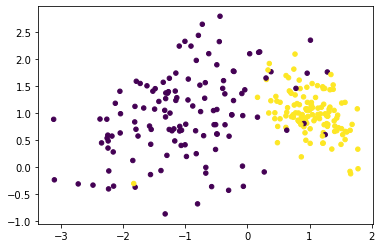

In [88]:
plt.scatter(X[:,0],X[:,1],20.0,Y)
plt.show()

In [89]:
svc = SVC(kernel='linear')
svc.fit(X,Y)

SVC(kernel='linear')

In [90]:
svc.score(X,Y)

0.952

In [105]:
# Nu-SVC
from sklearn.svm import NuSVC
nusvc = NuSVC(kernel='linear', nu=0.15)
nusvc.fit(X,Y)

NuSVC(kernel='linear', nu=0.15)

In [106]:
nusvc.score(X,Y)

0.896

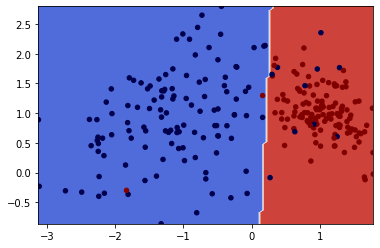

In [93]:
plot_class(svc,X,Y,100)

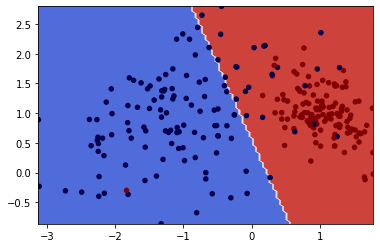

In [107]:
plot_class(nusvc,X,Y,100)

## SVR

In [123]:
#Dataset
X = np.linspace(-3,3,150)
Y = np.exp(X)*(X-8) + np.random.randint(-10,10, 150)

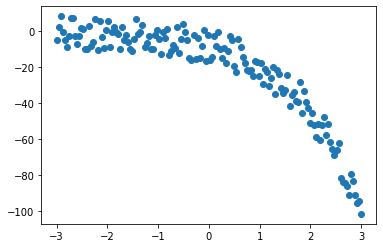

In [124]:
plt.scatter(X,Y)
plt.show()

In [125]:
from sklearn.svm import SVR
svr = SVR()

In [127]:
svr.fit(X.reshape(-1,1),Y)
svr.score(X.reshape(-1,1),Y)

0.6984303070503388

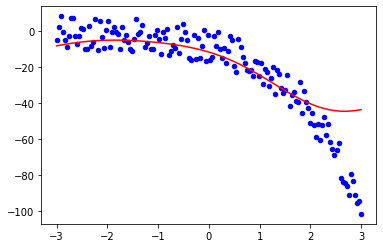

In [129]:
Y_predict = svr.predict(X.reshape(-1,1))
plt.scatter(X,Y,20.0,'b')
plt.plot(X,Y_predict,'r')
plt.show()

Optimizacion de hiper-parametros

In [203]:
param_grid = [
              {
                  'kernel':['rbf','poly','linear','sigmoid'],
                  'C':[0.05, 0.08, 0.1, 0.2],
                  'epsilon':[0.05,0.1],
                  'coef0':[-0.1, 0.0, 0.1, 0.2]
              }
]

In [193]:
def regression_grid(parametros):
  parametros = parametros[0]
  n = len(parametros)
  n_iteraciones = 1
  for key in parametros.keys():
    l = len(parametros[key])
    n_iteraciones *= l
  total = n_iteraciones
  diccionarios = [dict() for x in range(total)]
  keys = parametros.keys()
  for key in parametros.keys():
    elementos = parametros[key]
    n_elementos = len(parametros[key])
    n_iteraciones  = n_iteraciones/n_elementos
    data = parametros[key]
    for i in range(total):
      diccionarios[i][key] = data[int((i//n_iteraciones) % n_elementos )]
  return diccionarios

In [204]:
parametros = regression_grid(param_grid)

In [206]:
x_train = np.reshape(X,(-1,1))

In [207]:
best_score = 0
for p in parametros:
  svr =SVR(**p)
  svr.fit(x_train,Y)
  score = svr.score(x_train,Y)
  if score>best_score:
    best_params = svr.get_params
  best_score = max(best_score, score)

In [208]:
best_score

0.8769185407464483

In [215]:
best_params 

<bound method BaseEstimator.get_params of SVR(C=0.2, coef0=0.2, epsilon=0.05, kernel='poly')>

In [217]:
svr = SVR(kernel='poly', coef0 =0.2, epsilon=0.05, C=0.2)

In [218]:
svr.fit(x_train,Y)

SVR(C=0.2, coef0=0.2, epsilon=0.05, kernel='poly')

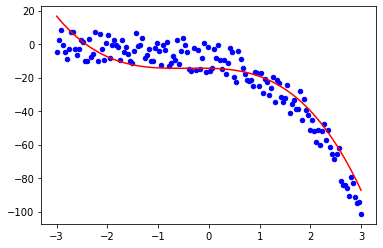

In [219]:
Y_predict = svr.predict(X.reshape(-1,1))
plt.scatter(X,Y,20.0,'b')
plt.plot(X,Y_predict,'r')
plt.show()